In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd


In [112]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [103]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data["HeartDisease"]=encode.fit_transform(data["HeartDisease"])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [114]:
x=data[data.columns[3:8]][:921]
x


,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR
0,140,289,0,Normal,172
1,160,180,0,Normal,156
2,130,283,0,ST,98
3,138,214,0,Normal,108
4,150,195,0,Normal,122
...,...,...,...,...,...
913,110,264,0,Normal,132
914,144,193,1,Normal,141
915,130,131,0,Normal,115
916,130,236,0,LVH,174


In [115]:
y=data["HeartDisease"][:921]

In [116]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=24)


In [120]:
x_train = np.array(x_train, dtype=float)

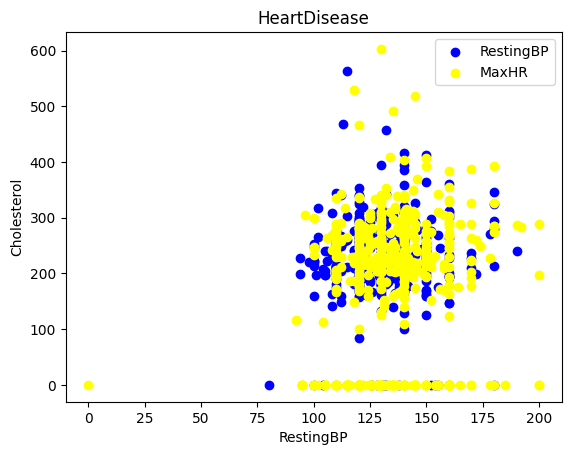

In [124]:
plt.scatter(x[y==0]["RestingBP"],x[y==0]["Cholesterol"], color='blue', label='RestingBP')
plt.scatter(x[y==1]["RestingBP"],x[y==1]["Cholesterol"], color='yellow', label='MaxHR') # Use column names to index DataFrame
plt.title('HeartDisease')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

In [122]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
n_hidden=50
n_epochs=1000
learning_rate=1
weights_hidden=np.random.normal(0.0,size=(x_train.shape[1],n_hidden))
weights_output=np.random.normal(0.0,size=(n_hidden))
hist_loss=[]
hist_accuracy=[]
print(weights_hidden)
print(weights_output)

[[-6.42125850e-01 -1.45842505e+00 -4.30308045e-01 -9.21269787e-01
  -1.66631576e+00 -4.24086695e-02  8.42796931e-01  1.14154633e-01
   7.73392600e-01 -6.06871084e-01 -1.46713587e+00  2.21528175e+00
  -2.32495486e-01 -3.94377411e-01 -1.79029407e+00  3.39884051e-01
   1.66920606e+00 -1.41357845e+00  4.18321673e-01 -1.13802304e+00
  -4.34035727e-03  1.08086539e+00 -1.42141901e+00 -4.56541484e-01
  -3.32483658e-01  1.23784582e+00  5.33500484e-01  8.31541220e-01
  -1.08698437e+00 -1.79576394e+00 -1.16948847e+00 -4.68574807e-01
  -6.01737605e-01  8.49555669e-01  1.82524352e-01 -2.08559695e+00
   5.42347397e-01 -1.06710592e+00 -1.52770957e+00 -4.64157032e-01
   1.93073684e-01  1.97135134e+00  1.56297052e+00 -6.12051414e-01
  -4.41631707e-01 -8.84942511e-01 -1.02439603e-01  4.87439873e-01
   9.53092873e-01  3.63325725e-01]
 [ 1.49619846e+00  1.87199707e+00 -6.17574568e-01 -1.72108959e+00
   2.94160234e-01 -7.16931547e-01  1.37712678e+00  4.63901881e-01
  -1.04290520e+00 -8.16204251e-01 -9.6705